# Image Compression Using K-Means

### importing libraries

In [6]:
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.image as image
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets
import os

In [7]:
image=io.imread(r'C:\Users\Phaneendra\Desktop\phani\2.jpg')       #reading a image...

In [8]:
type(image)

imageio.core.util.Array

In [9]:
image.shape                                                      #shape of the image..

(562, 1000, 3)

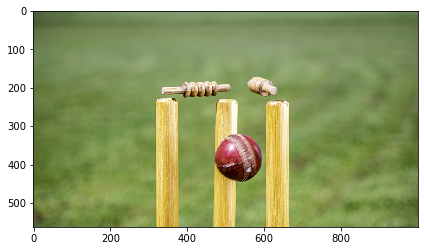

In [10]:
io.imshow(image)

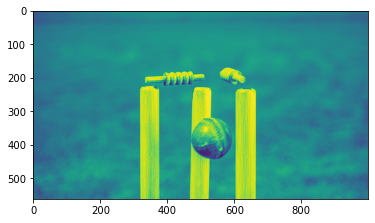

In [11]:
plt.imshow(image[:,:,0])        #Red channel

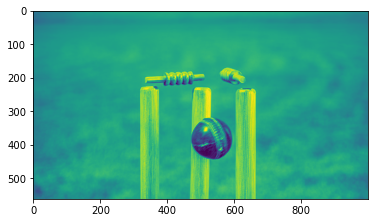

In [12]:
plt.imshow(image[:,:,1])            #Green channel

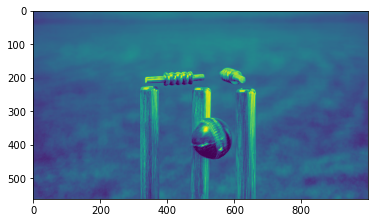

In [13]:
plt.imshow(image[:,:,2])                #Blue channel

In [14]:
image=image/255                                     #Scaling the Image.

In [15]:
image=image.reshape(562*1000,3)                     #Flattening the image converting into one-dimensional...

In [16]:
from sklearn.cluster import MiniBatchKMeans         

In [17]:
model=MiniBatchKMeans(n_clusters=12)              #choosing K-value
model.fit(image)
pred=model.predict(image)

In [18]:
model.labels_                                     #cluster labels..

array([2, 2, 2, ..., 2, 2, 2])

In [19]:
image=model.cluster_centers_[model.labels_] #Replacing the each point with respective to its respective cluster centroid...

In [20]:
image=image.reshape(562,1000,3)             #Reshaping the image to its original reshape....

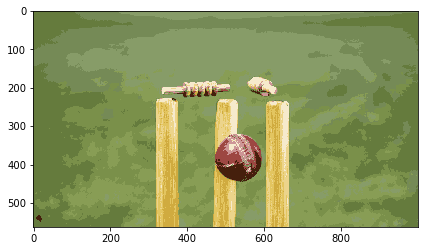

In [21]:
io.imshow(image)                            #compressed image

In [19]:
io.imsave('image-with-k=128.jpg',image)          #saving the compressed image..

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


# Function to compress the Images using the interactive jupiter widgets..

In [4]:
img_dir = r'C:\Users\Phaneendra\Desktop\phani/'
from sklearn.cluster import MiniBatchKMeans

In [5]:
@interact
def color_compression(image=os.listdir(img_dir), k=IntSlider(min=1,max=256,step=1,value=16,
                                                             continuous_update=False,
                                                             layout=dict(width='100%'))):
    input_img = io.imread(img_dir + image)
    img_data = (input_img / 255.0).reshape(-1, 3)
    model=MiniBatchKMeans(n_clusters=k)
    model.fit(img_data)
    pred=model.predict(img_data)
    k_img=model.cluster_centers_[model.labels_]
    k_img=k_img.reshape(input_img.shape[0],input_img.shape[1],3)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('K-means Image Compression', fontsize=20)
    ax1.set_title('Compressed')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(k_img)
    ax2.set_title('Original (16,777,216 colors)')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.imshow(input_img)
    plt.subplots_adjust(top=0.85)
    plt.show()

interactive(children=(Dropdown(description='image', options=('.RData', '.Rhistory', '2.jpg', 'file.txt', 'gras…